# Word Vectors

In [1]:
import requests
import json

In [2]:
GUTENBERG_URL ='https://www.gutenberg.org/files/{}/{}-0.txt'

In [5]:
with open('ProjectGutenbergBooks.json', 'r') as catalog_file:
    catalog = json.load(catalog_file)

In [6]:
catalog

[{'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'id': 1342},
 {'title': 'A Christmas Carol in Prose',
  'author': 'Charles Dickens',
  'id': 46},
 {'title': 'A Tale of Two Cities', 'author': 'Charles Dickens', 'id': 98},
 {'title': 'Frankenstein; Or, The Modern Prometheus',
  'author': 'Mary Wollstonecraft Shelley',
  'id': 84},
 {'title': 'Dracula', 'author': 'Bram Stoker', 'id': 345},
 {'title': 'Heart of Darkness', 'author': 'Joseph Conrad', 'id': 219},
 {'title': 'Moby Dick; Or, The Whale',
  'author': 'Herman Melville',
  'id': 2701},
 {'title': "Alice's Adventures in Wonderland",
  'author': 'Lewis Carroll',
  'id': 11},
 {'title': 'The Adventures of Sherlock Holmes',
  'author': 'Arthur Conan Doyle',
  'id': 1661},
 {'title': 'A Modest Proposal', 'author': 'Jonathan Swift', 'id': 1080}]

In [7]:
import re

GUTENBERG_URL ='https://www.gutenberg.org/files/{}/{}-0.txt'

def load_book(book_id):
    url = GUTENBERG_URL.format(book_id, book_id)
    contents = requests.get(url).text
    cleaned_contents = re.sub(r'\r\n', ' ', contents)
    return cleaned_contents

In [8]:
book_ids = [ book['id'] for book in catalog ]
books = [ load_book(id) for id in book_ids]

In [9]:
books

["ï»¿ The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org   Title: Pride and Prejudice  Author: Jane Austen  Release Date: August 26, 2008 [EBook #1342] Last Updated: November 12, 2019   Language: English  Character set encoding: UTF-8  *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***     Produced by Anonymous Volunteers, and David Widger  THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [# 42671 ]  cover           Pride and Prejudice        By Jane Austen          CONTENTS           Chapter 1           Chapter 2           Chapter 3           Chapter 4           Chapter 5           Chapter 6           Chapter 7           Chapter 8           Chapter 9           Chapter 10           Chapt

In [10]:
from gensim.summarization import textcleaner
from gensim.utils import simple_preprocess

def to_sentences(book):
    sentences = textcleaner.split_sentences(book)
    sentence_tokens = [simple_preprocess(sentence) for sentence in sentences]
    return sentence_tokens

In [11]:
books_sentences = [to_sentences(book) for book in books]
documents = [ sentence for book_sent in books_sentences for sentence in book_sent ]

In [12]:
len(documents)

32956

In [13]:
from gensim.models import Word2Vec
# build vocabulary and train model
model = Word2Vec(
        documents,
        size=100,
        window=10,
        min_count=2,
        workers=10)
model.train(documents, total_examples=len(documents), epochs=50)

(27837948, 37583300)

In [14]:
model.wv.most_similar(positive='worse')

[('kinder', 0.6132738590240479),
 ('better', 0.6106471419334412),
 ('narrower', 0.5969187021255493),
 ('happier', 0.59630286693573),
 ('older', 0.590795636177063),
 ('more', 0.5832642316818237),
 ('handsomer', 0.5634649991989136),
 ('larger', 0.527176022529602),
 ('less', 0.5197071433067322),
 ('mightier', 0.5186996459960938)]

In [15]:
model.wv.most_similar(positive='king')

[('queen', 0.4892723262310028),
 ('angrily', 0.4586837887763977),
 ('knave', 0.4567120671272278),
 ('mab', 0.4487399756908417),
 ('duchess', 0.4196099042892456),
 ('ormstein', 0.41911113262176514),
 ('executioner', 0.4123227298259735),
 ('bohemia', 0.4107914865016937),
 ('duke', 0.40282514691352844),
 ('congregational', 0.40134865045547485)]

In [16]:
model.wv.most_similar(positive='death')

[('murder', 0.42081359028816223),
 ('misery', 0.40140873193740845),
 ('fulfilled', 0.3904496729373932),
 ('soul', 0.3869689702987671),
 ('existence', 0.3681632876396179),
 ('anguish', 0.3579333424568176),
 ('machinations', 0.3508266508579254),
 ('wretched', 0.3496628403663635),
 ('memory', 0.3486027717590332),
 ('strangled', 0.34683454036712646)]

In [18]:
model.wv.most_similar(positive='country')

[('parish', 0.5060415267944336),
 ('london', 0.5056984424591064),
 ('town', 0.4915829598903656),
 ('neighbourhood', 0.48824694752693176),
 ('france', 0.48487016558647156),
 ('louisiana', 0.4626108407974243),
 ('carriages', 0.45396506786346436),
 ('england', 0.44737228751182556),
 ('society', 0.444348007440567),
 ('derbyshire', 0.4409436881542206)]

In [19]:
model.wv.most_similar(positive='indian')

[('island', 0.6098798513412476),
 ('oriental', 0.5871589779853821),
 ('glories', 0.5783570408821106),
 ('islands', 0.5629220604896545),
 ('sunda', 0.5605657696723938),
 ('american', 0.5595223903656006),
 ('jewelled', 0.5535464286804199),
 ('east', 0.5514822006225586),
 ('stranded', 0.5494892597198486),
 ('western', 0.5455816984176636)]

In [25]:
model.wv.most_similar(positive='money')

[('sum', 0.4857557713985443),
 ('notifies', 0.483262300491333),
 ('sums', 0.4794465899467468),
 ('paid', 0.477414608001709),
 ('writing', 0.43983349204063416),
 ('refund', 0.4313010275363922),
 ('amends', 0.4293377995491028),
 ('governess', 0.42602625489234924),
 ('scrap', 0.4091815948486328),
 ('marry', 0.3993932008743286)]

In [26]:
import gc
gc.collect()

1653

In [27]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [28]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def show_vector(word):
    vector = model.wv[word]
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False, 
                   labelbottom=False)
    ax.grid(False)
    print(word)
    ax.bar(range(len(vector)), vector, 0.5)

king


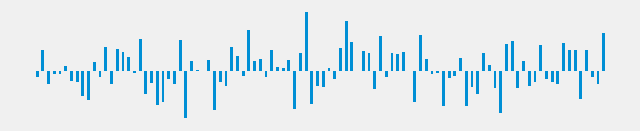

In [29]:
show_vector('king')

queen


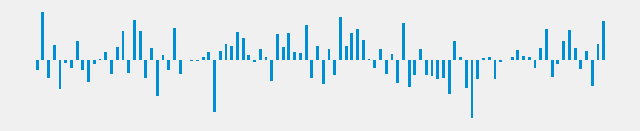

In [30]:
show_vector('queen')

happy


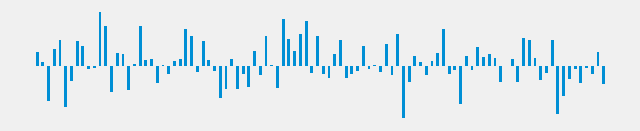

In [31]:
show_vector('happy')

sad


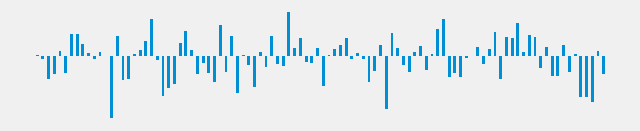

In [32]:
show_vector('sad')